# Basics of CNN
---

In [3]:
import imageio
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (20,10)

In [4]:
img = imageio.imread('./img.jpg')
img.shape

(811, 807, 3)

# Image
---


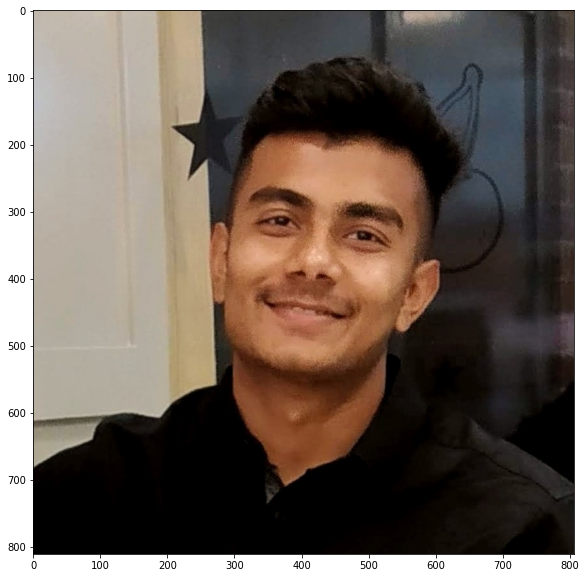

In [5]:
plt.imshow(img)

## RGB Channels

In [6]:
def show_rgb(img):
    for i in range(3):
        plt.subplot(1,3,i+1)
        plt.imshow(img[:,:,i], cmap ='gray')

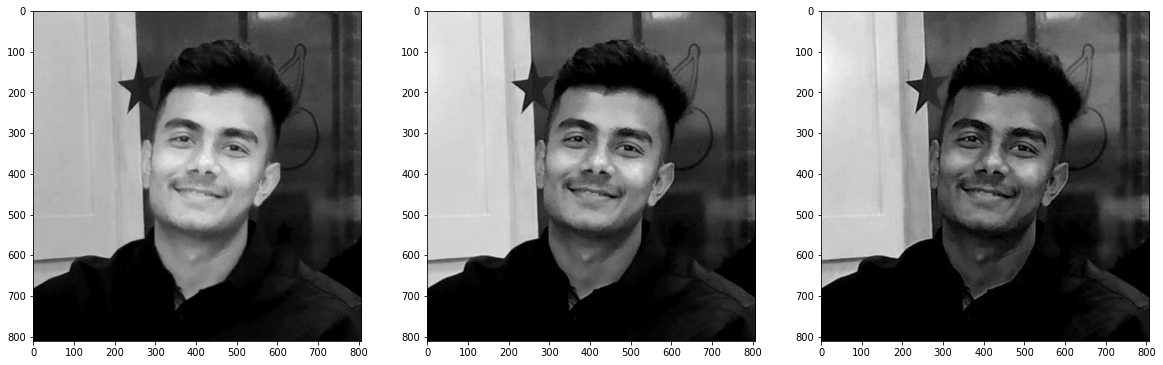

In [7]:
show_rgb(img)

# Convolutions and Layers
---

In [8]:
import torch
import numpy as np
import torch.nn.functional as F

## 1. Fully Conneted Layer

In [9]:
#Flat input tensor
x_fc = torch.randn(100,784)
x_fc

tensor([[ 1.2725, -0.8183, -1.5992,  ..., -0.2064,  1.6866, -0.6133],
        [ 1.0022,  0.3618, -1.0556,  ..., -0.7774,  0.2407,  0.2289],
        [-0.8255,  0.0520, -0.6248,  ..., -0.4812, -0.6891, -0.1226],
        ...,
        [-0.1364,  0.7133, -0.0716,  ...,  1.5463, -0.8474, -0.9761],
        [-0.5865, -0.1835, -0.9473,  ...,  0.4255, -0.0128, -0.6977],
        [-0.4897,  0.1598,  0.0580,  ..., -0.9024,  0.0675, -0.6827]])

In [10]:
#Weights or Features
W = torch.randn(784, 10)/np.sqrt(784)
W.requires_grad_()

tensor([[ 4.8775e-03,  3.3685e-02,  6.2724e-02,  ...,  3.8972e-02,
         -1.1913e-02, -5.0287e-02],
        [-2.9772e-02,  7.8358e-03, -1.5209e-02,  ...,  2.2917e-02,
         -6.2680e-03,  1.9191e-03],
        [ 3.1935e-02, -5.1771e-03,  4.7871e-02,  ...,  4.0209e-02,
         -2.9253e-02,  5.4258e-03],
        ...,
        [ 3.0694e-02,  5.3410e-04,  2.3141e-02,  ...,  8.3642e-05,
         -5.6551e-02, -2.2270e-02],
        [-3.3862e-03, -1.9589e-02,  8.4131e-03,  ...,  3.4943e-02,
          1.4475e-03,  3.2456e-02],
        [-1.8690e-02,  3.8126e-03,  2.7835e-02,  ...,  2.7671e-02,
         -3.1017e-02,  5.5375e-02]], requires_grad=True)

In [11]:
b = torch.zeros(10, requires_grad=True)
b

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)

In [12]:
y_pre = torch.matmul(x_fc,W)+b
y = F.relu(y_pre)
x_fc.shape, y.shape

(torch.Size([100, 784]), torch.Size([100, 10]))

## 2. Convolution Layer

#### Layer 1

In [13]:
x_cnn = torch.randn(100,1,28,28)
x_cnn.shape

torch.Size([100, 1, 28, 28])

In [14]:
W1 = torch.randn(16, 1, 3, 3)/np.sqrt(1*3*3)
W1.requires_grad_()

tensor([[[[ 0.1594,  0.1254,  0.2560],
          [-0.4446, -0.1746, -0.2815],
          [ 0.0920,  0.0512,  0.0775]]],


        [[[ 0.1099,  0.1449,  0.1705],
          [ 0.2820,  0.0276,  0.2924],
          [ 0.2505,  0.0305, -0.4065]]],


        [[[-0.3070, -0.4901, -0.0257],
          [ 0.0703, -0.2092, -0.1690],
          [-0.0956,  0.2875,  0.1088]]],


        [[[ 0.0276, -0.7903, -0.2628],
          [ 0.8759,  0.2449,  0.0216],
          [-0.2190, -0.3379, -0.1423]]],


        [[[ 0.1522,  0.3181, -0.2734],
          [-0.1690,  0.0438,  0.6572],
          [-0.5008,  0.6054,  0.3140]]],


        [[[ 0.2727,  0.2883,  0.0700],
          [-0.3331,  0.1535, -0.1717],
          [-0.3244, -0.1313,  0.3276]]],


        [[[-0.2760,  0.3111, -0.5243],
          [ 0.0446,  0.4442, -0.3922],
          [-0.1383,  0.6442,  0.5928]]],


        [[[-0.0702,  0.1425,  0.2236],
          [-0.2310,  0.3816, -0.1699],
          [-0.0348,  0.4482, -0.0870]]],


        [[[-0.1590, -0.1797, -0.

In [15]:
b1 = torch.zeros(16, requires_grad=True)
b1

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       requires_grad=True)

In [16]:
conv1_pre = F.conv2d(x_cnn, W1, bias=b1, stride=1, padding=1)
conv1 = F.relu(conv1_pre)

In [17]:
x_cnn.shape, conv1.shape

(torch.Size([100, 1, 28, 28]), torch.Size([100, 16, 28, 28]))

#### Layer 2

In [18]:
W2 = torch.randn(32, 16, 3, 3)/np.sqrt(16*3*3)
W2.requires_grad_()

b2 = torch.zeros(32, requires_grad=True)

conv2 = F.relu(F.conv2d(conv1, W2, b2, stride=1, padding=1))
conv2.shape

torch.Size([100, 32, 28, 28])

Reshaping 

In [19]:
M = torch.zeros(4, 3)

M2 = M.view(1,1,12)
M3 = M.view(-1)
M4 = M.view(-1,2,3)
M5 = M.view(2,1,2,3)

print("M:{},\nM2: {}, \nM3: {}, \nM4: {},\nM5: {}." .format(M, M2, M3, M4, M5))

M:tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
M2: tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]]), 
M3: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 
M4: tensor([[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]]),
M5: tensor([[[[0., 0., 0.],
          [0., 0., 0.]]],


        [[[0., 0., 0.],
          [0., 0., 0.]]]]).


In [20]:
# Reshape flat input image into a 4D batched image input
x_flat = torch.randn(100, 784)
x_reshaped = x_flat.view(-1, 1, 28, 28)

# Print input shape
print(x_reshaped.shape) #CNN expects 4D input: [batch, channel, height, width]

torch.Size([100, 1, 28, 28])


In [21]:
# Flatten convolutional feature maps into a vector
h_flat = conv2.view(-1, 28*28*32)

# Print output shape
print(h_flat.shape) #"flatten" a CNN's 4D output to 2D

torch.Size([100, 25088])


## Pooling and Striding 

### Pooling

In [22]:
print("Shape of conv2 feature maps before pooling : {0}".format(conv2.shape))

Shape of conv2 feature maps before pooling : torch.Size([100, 32, 28, 28])


In [23]:
max_pool2 = F.max_pool2d(conv2, kernel_size = 2)
print("Shape of conv2 feature maps after pooling : {0}".format(max_pool2.shape))

Shape of conv2 feature maps after pooling : torch.Size([100, 32, 14, 14])


In [24]:
avg_pool2 = F.avg_pool2d(conv2, kernel_size=2)
print("Shape of conv2 feature maps after avg pooling: {0}".format(avg_pool2.shape))

Shape of conv2 feature maps after avg pooling: torch.Size([100, 32, 14, 14])


Feature map: 

In [25]:
feature_map_fig = torch.tensor(np.array([[1,1,2,4], [5,6,7,8], [3,2,1,0], [1,2,3,4]], dtype = np.float32))
fmap_fig = feature_map_fig.view(1,1,4,4)
print("Feature map shape pre-pooling: {}".format(fmap_fig.shape))

Feature map shape pre-pooling: torch.Size([1, 1, 4, 4])


In [26]:
# Maxpool
max_pool_fig = F.max_pool2d(fmap_fig, kernel_size=2)
print("\nMax pool")
print("Shape: {}".format(max_pool_fig.shape))
print(torch.squeeze(max_pool_fig))


Max pool
Shape: torch.Size([1, 1, 2, 2])
tensor([[6., 8.],
        [3., 4.]])


In [27]:
# Avgpool
avg_pool_fig = F.avg_pool2d(fmap_fig, kernel_size=2)
print("\nAvg pool")
print("Shape: {}".format(avg_pool_fig.shape))
print(torch.squeeze(avg_pool_fig))


Avg pool
Shape: torch.Size([1, 1, 2, 2])
tensor([[3.2500, 5.2500],
        [2.0000, 2.0000]])


### Striding

In [28]:
# Since striding is part of the convolution operation, we'll start with the feature maps before the 2nd convolution
print("Shape of conv1 feature maps: {0}".format(conv1.shape))

Shape of conv1 feature maps: torch.Size([100, 16, 28, 28])


In [29]:
# Apply 2nd convolutional layer, with striding of 2
conv2_strided = F.relu(F.conv2d(conv1, W2, bias=b2, stride=2, padding=1))

# Print output shape
print("Shape of conv2 feature maps with stride of 2: {0}".format(conv2_strided.shape))

Shape of conv2 feature maps with stride of 2: torch.Size([100, 32, 14, 14])


## Custom CNN

In [36]:
import torch.nn as nn
from torchsummary import summary

In [33]:
class Custom_CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5, padding=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5, padding=2)
        self.fc1 = nn.Linear(7*7*64, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)

        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)

        x = x.view(-1 , 7*7*64)
        x = self.fc1(x)
        x = F.relu(x)

        x = self.fc2(x)
        return x

In [34]:
model = Custom_CNN()
model

Custom_CNN(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (fc1): Linear(in_features=3136, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)

In [42]:
summary(model, (1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             832
            Conv2d-2           [-1, 64, 14, 14]          51,264
            Linear-3                  [-1, 256]         803,072
            Linear-4                   [-1, 10]           2,570
Total params: 857,738
Trainable params: 857,738
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.29
Params size (MB): 3.27
Estimated Total Size (MB): 3.56
----------------------------------------------------------------


# END